In [110]:
import matplotlib.pyplot as plot
import pandas as pd
import squarify as sqr
from matplotlib.pyplot import figure
import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [3]:
#Calcola le percentuali
def percentualizzatore(totale, parte):
    return round((100*parte)/totale, 2)

# Dati anagrafica dosi

In [4]:
raw_anagrafica = pd.read_csv ('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv', sep = ',')

anagrafica = raw_anagrafica[['fascia_anagrafica', 'totale', 'prima_dose', 'seconda_dose']]
print(anagrafica)

  fascia_anagrafica   totale  prima_dose  seconda_dose
0             16-19    49129       36576         12553
1             20-29   925695      615877        309818
2             30-39  1291534      874921        416613
3             40-49  1849472     1298157        551315
4             50-59  2712957     1949015        763942
5             60-69  3746150     3060827        685323
6             70-79  4901208     4129289        771919
7             80-89  5880823     3210283       2670540
8               90+  1287396      723888        563508


In [5]:
labels = []
prima_dose = []
seconda_dose = []
totale = 0

for i in range(len(anagrafica['fascia_anagrafica'])):
    labels.append(anagrafica['fascia_anagrafica'][i])
    prima_dose.append(anagrafica['prima_dose'][i])    
    seconda_dose.append(anagrafica['seconda_dose'][i])
    totale += anagrafica['seconda_dose'][i]

In [6]:
decenn = 2871056
ventenn = 2955888 + 3128494
trentenn = 3282441 + 3572191
quarantenn = 4187464 + 4749765
cinquantenn = 4876704 + 4537491
sessantenn = 3893350 + 3471014
settantenn = 3324360 + 2644013
ottantenn = 2231536 + 1396624
ultranovant = 616360 + 160379 + 14804

## Grafico stacked bar plot - Sbagliato

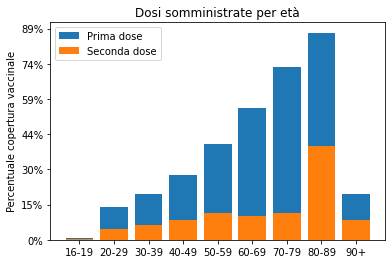

In [7]:
fig, ax = plot.subplots()

width = 0.8
ax.bar(labels, prima_dose, width, label='Prima dose', bottom=seconda_dose)
ax.bar(labels, seconda_dose, width, label='Seconda dose')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=totale, decimals=None, symbol='%', is_latex=False))

ax.set_ylabel('Percentuale copertura vaccinale')
ax.set_title('Dosi somministrate per età')
ax.legend()
plot.savefig(fname='grafico_stackedbarplot.png')

plot.show()

# Grafici a torta per fascia di età

In [8]:
def pie_graph_3values(vax, primadose, nonvax, title):
    
    labels = 'Vaccinati', 'Solo prima dose', 'Non vaccinati'

    sizes = [vax, primadose, nonvax]
    explode = (0.1, 0, 0)
    colors = ['#E31E82','#FDD001','#0065CC']

    fig1, ax1 = plot.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')
    plot.title(title) 
    plot.savefig(fname='grafico_' + title + '.png')

    return (plot.show())

In [9]:
somministrazioni_vaccini = pd.read_csv ('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv', sep = ',')
fornitore_fasce = somministrazioni_vaccini[['fornitore','fascia_anagrafica', 'prima_dose', 'seconda_dose']]

print(fornitore_fasce)

                     fornitore fascia_anagrafica  prima_dose  seconda_dose
0              Pfizer/BioNTech             20-29           1             0
1              Pfizer/BioNTech             30-39           4             0
2              Pfizer/BioNTech             40-49           7             0
3              Pfizer/BioNTech             50-59           9             0
4              Pfizer/BioNTech             60-69          14             0
...                        ...               ...         ...           ...
46170  Vaxzevria (AstraZeneca)             50-59          55           418
46171  Vaxzevria (AstraZeneca)             60-69        8706             7
46172  Vaxzevria (AstraZeneca)             70-79        2944             8
46173  Vaxzevria (AstraZeneca)             80-89          31             0
46174  Vaxzevria (AstraZeneca)               90+           4             0

[46175 rows x 4 columns]


In [10]:
janssen_fasce = somministrazioni_vaccini[['fornitore','fascia_anagrafica', 'prima_dose']].loc[fornitore_fasce['fornitore'] == 'Janssen'].groupby('fascia_anagrafica')['prima_dose'].sum().reset_index()
janssen_fasce

,fascia_anagrafica,prima_dose
0,16-19,47
1,20-29,2969
2,30-39,3084
3,40-49,3653
4,50-59,10397
5,60-69,56755
6,70-79,53187
7,80-89,1187
8,90+,429


In [11]:
#Fascia 16-19
vaccinati19 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '16-19']['seconda_dose'] + janssen_fasce['prima_dose'][0]
primadose19 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '16-19']['prima_dose'] - vaccinati19
nonvax19 = (decenn - (primadose19+vaccinati19))
#Fascia 20-29
vaccinati29 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '20-29']['seconda_dose'] + janssen_fasce['prima_dose'][1]
primadose29 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '20-29']['prima_dose'] - vaccinati29
nonvax29 = (ventenn - (primadose29+vaccinati29))
#Fascia 30-39
vaccinati39 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '30-39']['seconda_dose'] + janssen_fasce['prima_dose'][2]
primadose39 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '30-39']['prima_dose'] - vaccinati39
nonvax39 = (trentenn - (primadose39+vaccinati39))
#Fascia 40-49
vaccinati49 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '40-49']['seconda_dose'] + janssen_fasce['prima_dose'][3]
primadose49 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '40-49']['prima_dose'] - vaccinati49
nonvax49 = (quarantenn - (primadose49+vaccinati49))
#Fascia 50-59
vaccinati59 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '50-59']['seconda_dose'] + janssen_fasce['prima_dose'][4]
primadose59 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '50-59']['prima_dose'] - vaccinati59
nonvax59 = (cinquantenn - (primadose59+vaccinati59))
#Fascia 60-69
vaccinati69 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '60-69']['seconda_dose'] + janssen_fasce['prima_dose'][5]
primadose69 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '60-69']['prima_dose'] - vaccinati69
nonvax69 = (sessantenn - (primadose69+vaccinati69))
#Fascia 70-79
vaccinati79 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '70-79']['seconda_dose'] + janssen_fasce['prima_dose'][6]
primadose79 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '70-79']['prima_dose'] - vaccinati79
nonvax79 = (settantenn - (primadose79+vaccinati79))
#Fascia 80-89
vaccinati89 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '80-89']['seconda_dose'] + janssen_fasce['prima_dose'][7]
primadose89 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '80-89']['prima_dose'] - vaccinati89
nonvax89 = (ottantenn - (primadose89+vaccinati89))
#Fascia 90-longlife
vaccinati99 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '90+']['seconda_dose'] + janssen_fasce['prima_dose'][8]
primadose99 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '90+']['prima_dose'] - vaccinati99
nonvax99 = (ultranovant - (primadose99+vaccinati99))

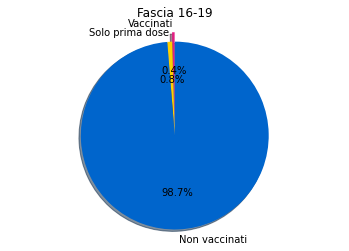

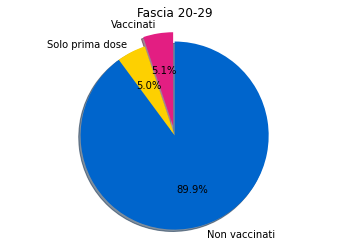

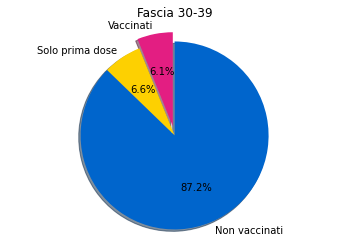

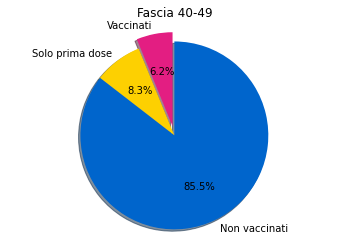

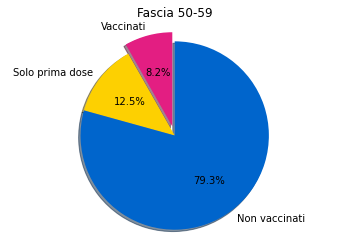

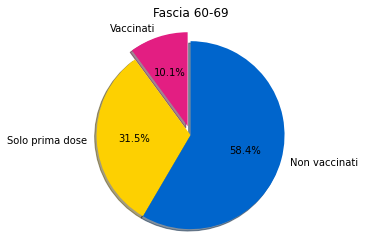

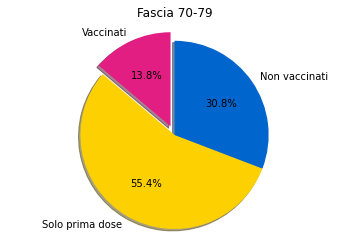

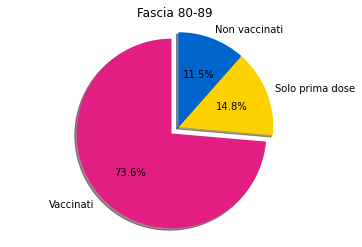

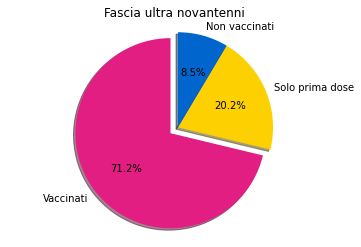

In [12]:
pie_graph_3values(vaccinati19, primadose19, nonvax19[0], "Fascia 16-19")
pie_graph_3values(vaccinati29, primadose29, nonvax29[1], "Fascia 20-29")
pie_graph_3values(vaccinati39, primadose39, nonvax39[2], "Fascia 30-39")
pie_graph_3values(vaccinati49, primadose49, nonvax49[3], "Fascia 40-49")
pie_graph_3values(vaccinati59, primadose59, nonvax59[4], "Fascia 50-59")
pie_graph_3values(vaccinati69, primadose69, nonvax69[5], "Fascia 60-69")
pie_graph_3values(vaccinati79, primadose79, nonvax79[6], "Fascia 70-79")
pie_graph_3values(vaccinati89, primadose89, nonvax89[7], "Fascia 80-89")
pie_graph_3values(vaccinati99, primadose99, nonvax99[8], "Fascia ultra novantenni")


In [13]:
#Persone che fanno vaccini con categoria Altro divisi per regione e età
furbetti_altro_eta = somministrazioni_vaccini[['fascia_anagrafica', 'categoria_altro']].groupby('fascia_anagrafica')['categoria_altro'].sum().reset_index()
furbetti_altro_regione = somministrazioni_vaccini[['nome_area', 'categoria_altro']].groupby('nome_area')['categoria_altro'].sum().reset_index()
furbetti_altro_regione



,nome_area,categoria_altro
0,Abruzzo,10309
1,Basilicata,4206
2,Calabria,17558
3,Campania,159534
4,Emilia-Romagna,13161
5,Friuli-Venezia Giulia,879
6,Lazio,102513
7,Liguria,15964
8,Lombardia,52397
9,Marche,8171


Text(0, 0.5, 'Dosi somministrate')

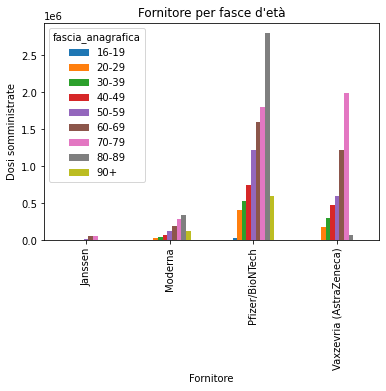

In [14]:
#Somministrazioni fornitore per fasce di età
fasce = fornitore_fasce.groupby(['fornitore', 'fascia_anagrafica'])['prima_dose'].sum().reindex().unstack()

fasce.plot(kind="bar")
plot.title("Fornitore per fasce d'età")
plot.xlabel("Fornitore")
plot.ylabel("Dosi somministrate")

In [15]:
def pie_graph_fornitore(fascia, title):
    
    labels = fascia.index[0], fascia.index[1], fascia.index[2], fascia.index[3]

    sizes = [fascia[0], fascia[1], fascia[2], fascia[3]]
    explode = (0, 0, 0, 0)
    colors = ['#2EC4B6','#FDD001','#E31E82', '#0065CC']

    fig1, ax1 = plot.subplots()
    ax1.pie(sizes, explode=explode,
        shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')
    plot.legend( labels, loc="best")
    plot.title(title) 
    plot.savefig(fname='grafico_' + title + '.png')


    return (plot.show())

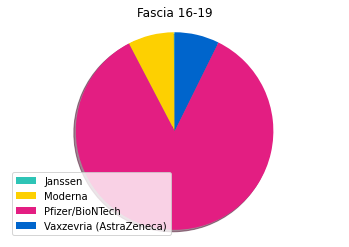

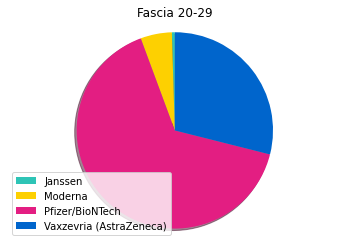

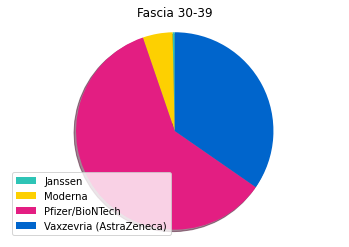

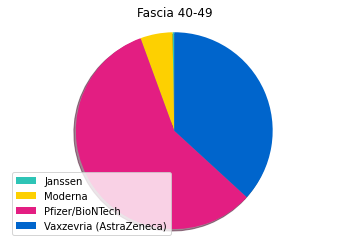

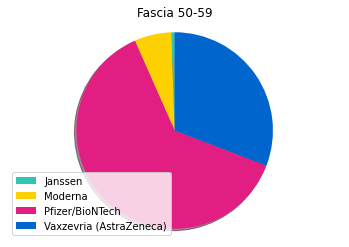

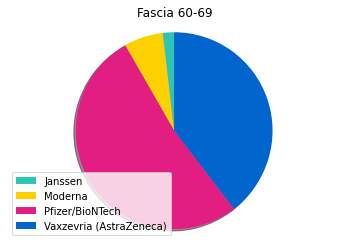

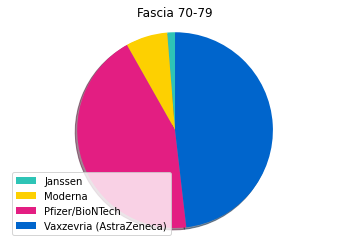

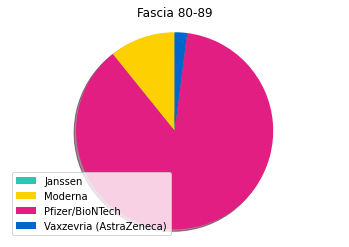

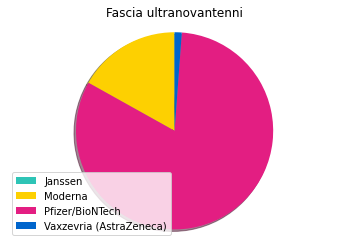

In [16]:
pie_graph_fornitore(fasce['16-19'], "Fascia 16-19")
pie_graph_fornitore(fasce['20-29'], "Fascia 20-29")
pie_graph_fornitore(fasce['30-39'], "Fascia 30-39")
pie_graph_fornitore(fasce['40-49'], "Fascia 40-49")
pie_graph_fornitore(fasce['50-59'], "Fascia 50-59")
pie_graph_fornitore(fasce['60-69'], "Fascia 60-69")
pie_graph_fornitore(fasce['70-79'], "Fascia 70-79")
pie_graph_fornitore(fasce['80-89'], "Fascia 80-89")
pie_graph_fornitore(fasce['90+'], "Fascia ultranovantenni")

In [17]:
#Barplot stacked per età - Fatto
#Grafici a torta per fascia età - Fatto
#Barplot delle dosi consegnate per fasce d'età - Fatto
#Percentuale popolazione italiana - Fatto
#Regione e percentuali vaccinati
#Percentuale categoria altro per regione
#Tipi di vaccino distribuiti per regioni
#Rapporto numero di abitanti/numero di vaccini ricevuti
#Tipi di vaccini per fasce di età - Fatto

## Grafici Treemap quadrati

In [18]:
consegne_vaccini_latest = pd.read_csv ('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv', sep = ',')
dosi_tot_fornitore = consegne_vaccini_latest[['fornitore', 'numero_dosi']].groupby('fornitore')['numero_dosi'].sum()

dosi_tot_fornitore #Totale dosi consegnate per azienda

fornitore
Janssen                      336800
Moderna                     2217900
Pfizer/BioNTech            17796870
Vaxzevria (AstraZeneca)     6565080
Name: numero_dosi, dtype: int64

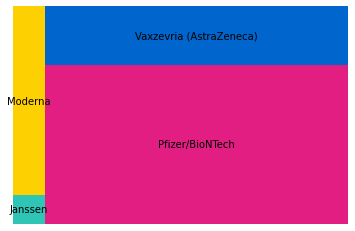

In [122]:
sizes = [dosi_tot_fornitore[0], dosi_tot_fornitore[1], dosi_tot_fornitore[2], dosi_tot_fornitore[3]]
label=[dosi_tot_fornitore.index[0], dosi_tot_fornitore.index[1], dosi_tot_fornitore.index[2], dosi_tot_fornitore.index[3]]
colors = ['#2EC4B6','#FDD001','#E31E82', '#0065CC']
sqr.plot(sizes, label = label, color = colors)
plot.axis('off')
plot.show()

# Grafico lineare
### Andamento somministrazioni giornaliero

In [20]:
somministrazioni_vaccini_sl = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv', sep=',')

somministrazioni_vaccini_sl

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_personale_scolastico,categoria_60_69,...,categoria_over80,categoria_soggetti_fragili,categoria_forze_armate,categoria_altro,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-02-01,PIE,8642,3053,5589,6177,1397,1068,0,0,...,0,0,0,0,578,8064,ITC,ITC1,1,Piemonte
1,2021-02-01,UMB,1285,342,943,877,35,373,0,0,...,0,0,0,0,48,1237,ITI,ITI2,10,Umbria
2,2021-03-21,MOL,1246,542,704,14,1,0,0,0,...,1090,133,0,6,479,767,ITF,ITF2,14,Molise
3,2021-03-21,PUG,2689,1224,1465,462,32,13,285,0,...,1792,15,38,47,585,2104,ITF,ITF4,16,Puglia
4,2021-02-28,LOM,7884,3255,4629,1106,761,76,31,594,...,4343,0,88,686,7668,216,ITC,ITC4,3,Lombardia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2021-01-01,UMB,274,105,169,273,0,0,0,0,...,0,0,0,1,274,0,ITI,ITI2,10,Umbria
2674,2021-03-18,LIG,4982,2124,2858,636,87,98,5,63,...,3691,219,6,97,2009,2973,ITC,ITC3,7,Liguria
2675,2021-04-07,CAM,24735,11770,12965,347,206,62,1043,135,...,6622,7998,274,540,20013,4722,ITF,ITF3,15,Campania
2676,2021-03-05,LIG,4869,2150,2719,801,221,81,5,5,...,3339,6,365,38,3737,1132,ITC,ITC3,7,Liguria


In [51]:
daily_andam = somministrazioni_vaccini_sl[['totale', 'data_somministrazione']].groupby('data_somministrazione')['totale'].sum()

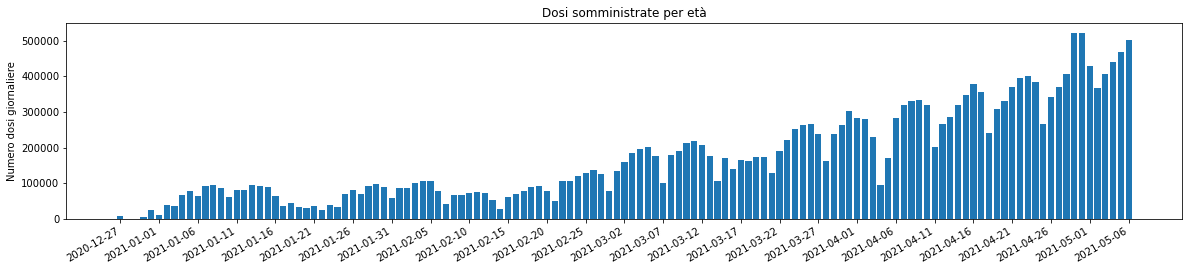

In [120]:
fig, ax = plot.subplots()

values = daily_andam.tolist()
labels = daily_andam.index.tolist()

width = 0.8

ax.bar(labels, values, width, label='Data somministrazione')

ax.set_ylabel('Numero dosi giornaliere')
ax.set_title('Dosi somministrate per età')

plot.xticks(labels[::5],  rotation='vertical')

fig.autofmt_xdate()

fig.set_size_inches(20, 4, forward=True)


plot.show(range(len(labels)), values)

In [23]:
sommin_region = somministrazioni_vaccini[['nome_area', 'prima_dose']].groupby('nome_area')['prima_dose'].sum()
print(sommin_region)

nome_area
Abruzzo                                356673
Basilicata                             153189
Calabria                               442509
Campania                              1465843
Emilia-Romagna                        1212337
Friuli-Venezia Giulia                  313926
Lazio                                 1496478
Liguria                                449404
Lombardia                             2840605
Marche                                 427575
Molise                                  83972
Piemonte                              1184157
Provincia Autonoma Bolzano / Bozen     148259
Provincia Autonoma Trento              161962
Puglia                                1086957
Sardegna                               397888
Sicilia                               1092522
Toscana                                955441
Umbria                                 233809
Valle d'Aosta / Vallée d'Aoste          35948
Veneto                                1359379
Name: prima_dose, dtype:

In [27]:
popAbr = sommin_region[0]/1322247
popBas = sommin_region[1]/570365
popCal = sommin_region[2]/1965128
popCam = sommin_region[3]/5839084
popEmR = sommin_region[4]/4448841
popFvg = sommin_region[5]/1217872
popLaz = sommin_region[6]/5898124
popLig = sommin_region[7]/1565307
popLom = sommin_region[8]/10018806
popMar = sommin_region[9]/1538055
popMol = sommin_region[10]/310449
popPie = sommin_region[11]/4392526
popBoz = sommin_region[12]/533715
popTre = sommin_region[13]/544745
popPug = sommin_region[14]/4063888
popSar = sommin_region[15]/1653135
popSic = sommin_region[16]/5056641
popTos = sommin_region[17]/3742437
popUmb = sommin_region[18]/888908
popVda = sommin_region[19]/126883
popVen = sommin_region[20]/4907529

In [28]:
data = {'Regione':  sommin_region.index.tolist(),
        'Rapporto': [popAbr, popBas, popCal, popCam, popEmR, popFvg, popLaz, popLig, popLom, popMar, popMol, 
                     popPie, popBoz, popTre, popPug, popSar, popSic, popTos, popUmb, popVda, popVen]}
rapp_rem = pd.DataFrame (data, columns = ['Regione','Rapporto'])

print (rapp_rem)

                               Regione  Rapporto
0                              Abruzzo  0.269748
1                           Basilicata  0.268581
2                             Calabria  0.225181
3                             Campania  0.251040
4                       Emilia-Romagna  0.272506
5                Friuli-Venezia Giulia  0.257766
6                                Lazio  0.253721
7                              Liguria  0.287103
8                            Lombardia  0.283527
9                               Marche  0.277997
10                              Molise  0.270486
11                            Piemonte  0.269585
12  Provincia Autonoma Bolzano / Bozen  0.277787
13           Provincia Autonoma Trento  0.297317
14                              Puglia  0.267467
15                            Sardegna  0.240687
16                             Sicilia  0.216057
17                             Toscana  0.255299
18                              Umbria  0.263029
19      Valle d'Aost

<AxesSubplot:xlabel='Regione'>

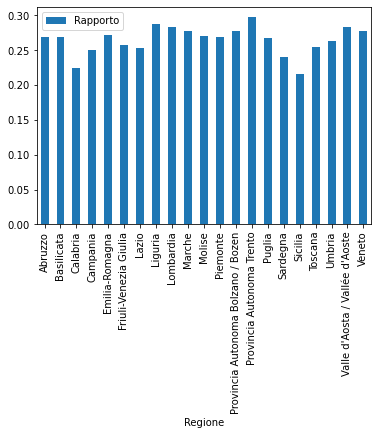

In [34]:
rapp_rem.plot(x='Regione', y='Rapporto', kind='bar')